# Kmeans y DBSCAN

## 1. Exploración y preprocesamiento de datos:

Cargamos los datos

Observando que los delimitadores están conformados por "\" hemos especificado el parametro "delimiter"

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
ds_path = "../data/CC GENERAL.csv"
df = pd.read_csv(ds_path)


Visualizamos la cabecera

In [69]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Exploramos los datos

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Observamos los valores unicos de las variables categóricas

In [71]:
from utils.eda import get_categoric_columns
categoric_columns = get_categoric_columns(df)
for i in categoric_columns:
    print(i)
    print(df[i].unique())

CUST_ID
['C10001' 'C10002' 'C10003' ... 'C19188' 'C19189' 'C19190']


Continuamos con la exploración de los datos

Visualizamos las últimas entradas

In [72]:
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


Verificamos los valores descriptivos

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Continuamos con el analisis

In [74]:
df.describe(include='object').T

,count,unique,top,freq
CUST_ID,8950,8950,C19190,1


### Identificación de valores nulos, duplicados y outliers

In [75]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


No se observan valores duplicados

Ahora observaremos la columna ID

In [76]:
df['CUST_ID'].duplicated().sum()

np.int64(0)

No se observan duplicados por lo tanto cada ID posee solo una entrada, por lo tanto podemos eliminar dicha columna ya que no aporta informacion importante al modelo

In [77]:
df.drop(['CUST_ID'],axis=1,inplace=True)

Volvemos a verificar si existen valores duplicados ahora que eliminamos la columna ID. Ya que pueden existir entradas de diferentes clientes que sean identicas.

In [78]:
duplicated = df.duplicated().sum()
print(f"Registros duplicados en df: {duplicated}")

Registros duplicados en df: 0


Ahora buscamos valores nulos

In [79]:
from utils.eda import get_nulll_data_info
get_nulll_data_info(df)

,datos sin NAs en q,Na en q,Na en %
MINIMUM_PAYMENTS,8637,313,3.50
CREDIT_LIMIT,8949,1,0.01
BALANCE,8950,0,0.00
BALANCE_FREQUENCY,8950,0,0.00
PURCHASES,8950,0,0.00
CASH_ADVANCE,8950,0,0.00
PURCHASES_FREQUENCY,8950,0,0.00
ONEOFF_PURCHASES,8950,0,0.00
INSTALLMENTS_PURCHASES,8950,0,0.00
PURCHASES_INSTALLMENTS_FREQUENCY,8950,0,0.00


Se observan valores Nulos en las columnas Minimun Payments y Credit Limit

In [80]:
df.dropna(inplace=True)

Eliminamos los valores nulos ya que representan una proporcion pequenha del dataset

Generamos Histogramas para visualizar la distribucion

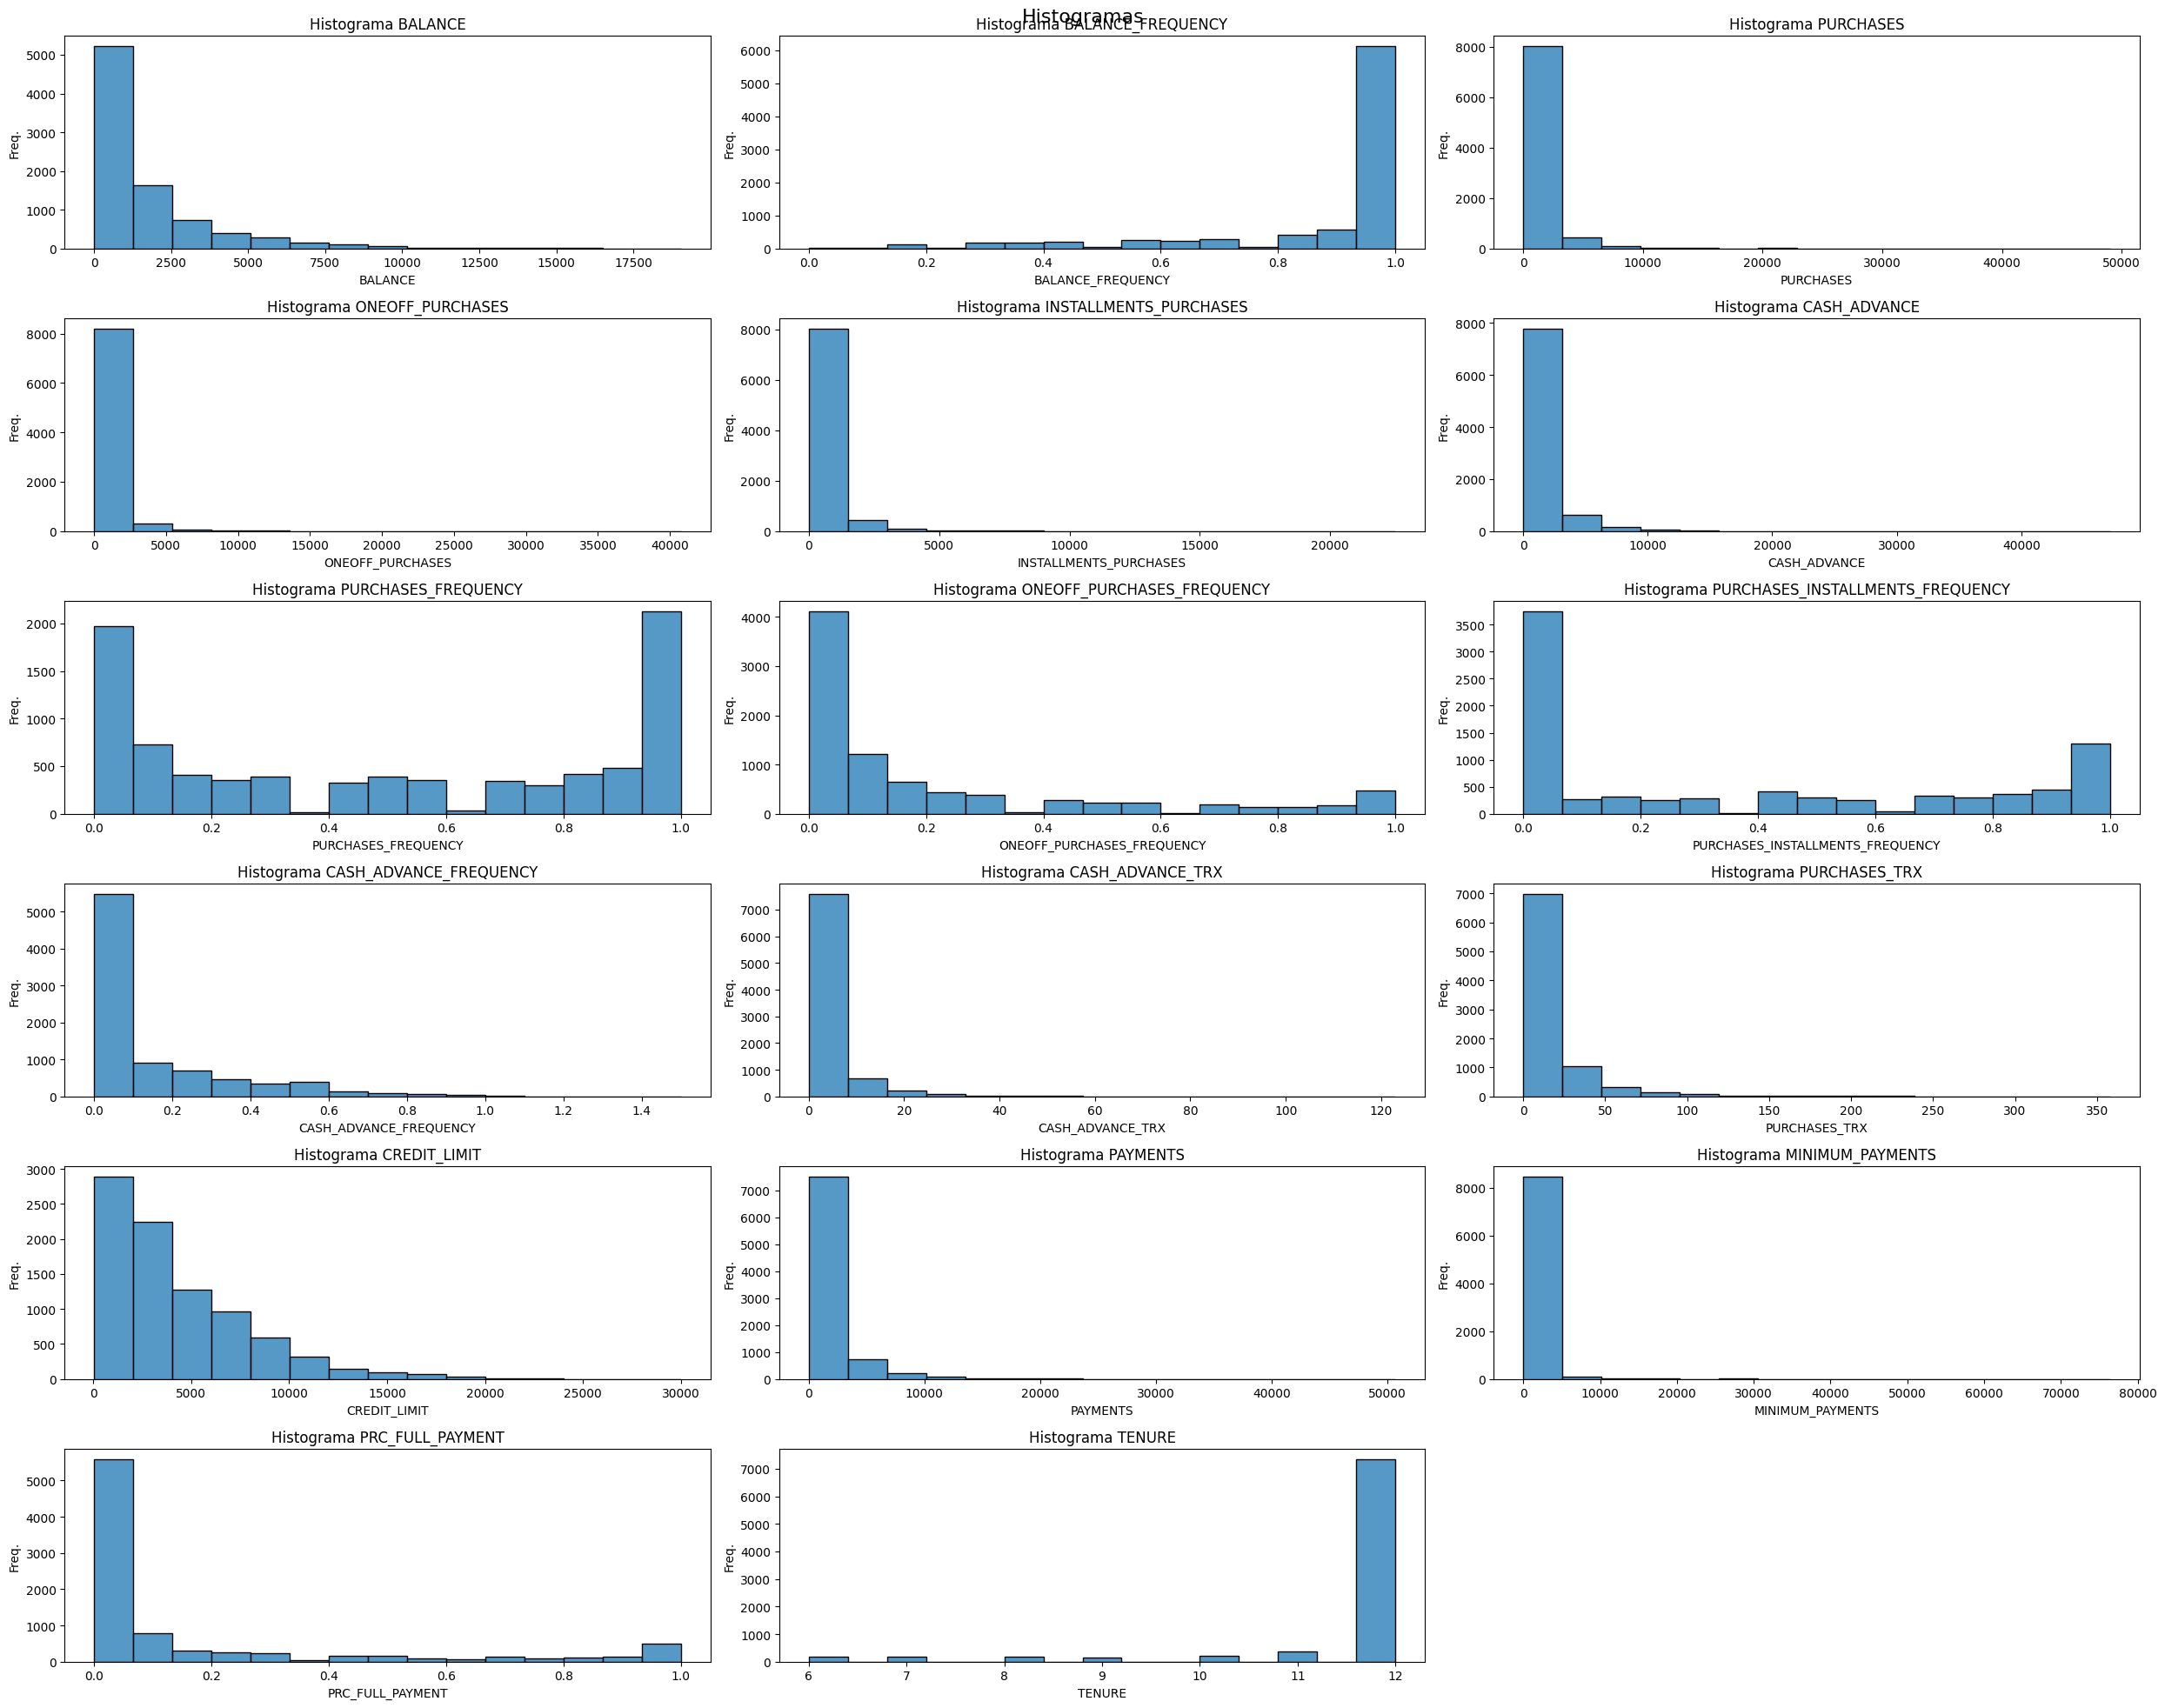

In [81]:
from utils.eda import graph_histogram, get_numeric_columns
graph_histogram(df, get_numeric_columns(df), bins=15, columns_number=3, figsize=(25, 20))


No se observa nada fuera de lo normal en los histogramas

Ahora verificamos los outliers

In [82]:
from utils.eda import get_outliers_data
get_outliers_data(df)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
N° Outliers,666.000000,1511.000000,768.000000,961.000000,811.000000,977.000000,0.000000,749.000000,0.000,341.000000,794.000000,716.000000,243.000000,785.000000,841.000000,1343.000000,1290.000000
% Outliers,7.711904,17.496526,8.893006,11.127837,9.390922,11.313108,0.000000,8.672997,0.000,3.948587,9.194071,8.290875,2.813803,9.089856,9.738305,15.551181,14.937471
Lim. mix,-2787.555807,0.772728,-1610.551250,-898.650000,-726.221250,-1698.578235,-1.166668,-0.499999,-1.125,-0.375000,-6.000000,-24.500000,-5750.000000,-1880.315043,-815.335830,-0.250001,12.000000
Lim. max,5040.846849,1.136364,2799.898750,1497.750000,1210.368750,2830.963725,2.166668,0.833333,1.875,0.625000,10.000000,43.500000,13850.000000,4250.016370,1809.995839,0.416668,12.000000


Visualizamos las gráficas de cajas de nuestras columnas

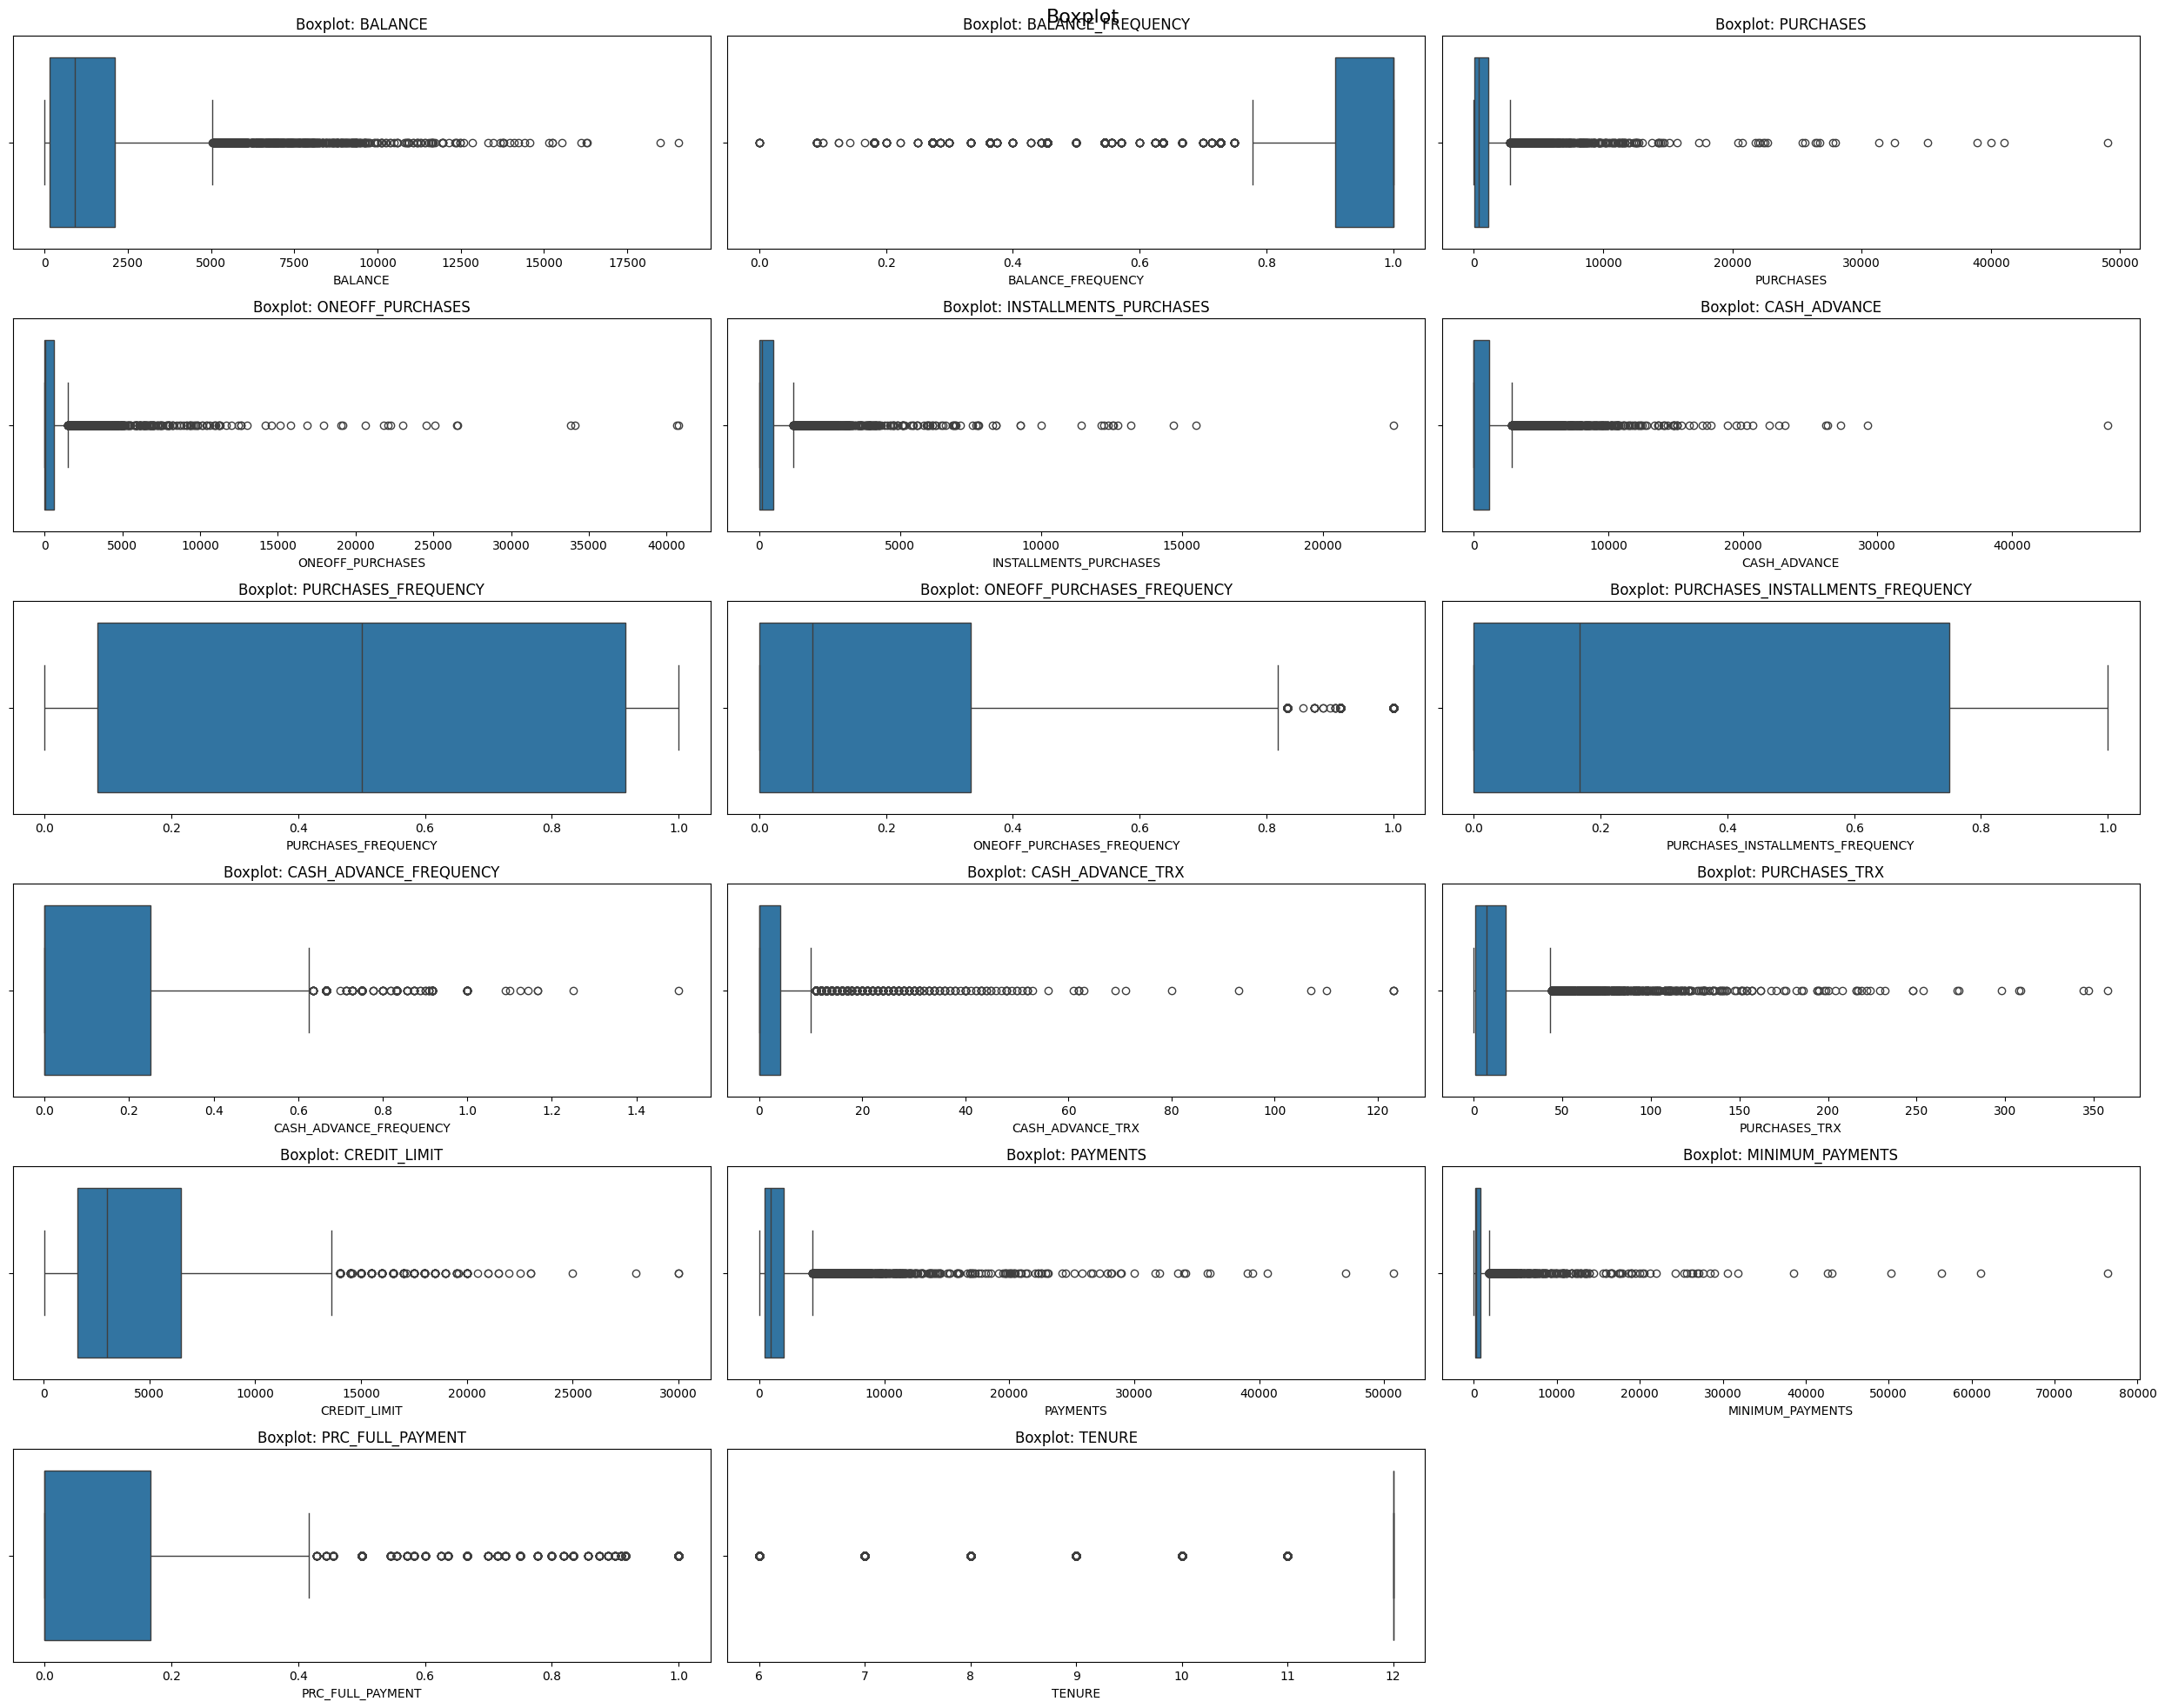

In [83]:
from utils.eda import graph_boxplot, get_numeric_columns
graph_boxplot(df, columns=get_numeric_columns(df), figsize=(25, 20))

Observamos algunos outliers

Ahora veremos las caracteristicas descriptivas de las variables númericas

In [84]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [85]:
from utils.eda import get_descriptive_statistics
get_descriptive_statistics(df)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
median,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
variation_coefficient,1.308730,0.232054,2.113357,2.784433,2.179540,2.133887,0.809017,1.457216,1.079368,1.466463,2.085901,1.674987,0.809192,1.630622,2.745057,1.859788,0.113659


Veremos las correlaciones entre las caracteristicas

In [86]:
from utils.eda import get_numeric_columns
numeric_columns = get_numeric_columns(df)
corr_matrix = df[numeric_columns].corr(method="pearson")
spearmann = df[numeric_columns].corr(method="spearman")
kendall = df[numeric_columns].corr(method="kendall")
corr_matrix

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT_LIMI

Ahora graficamos el mapa de calor de las correlaciones

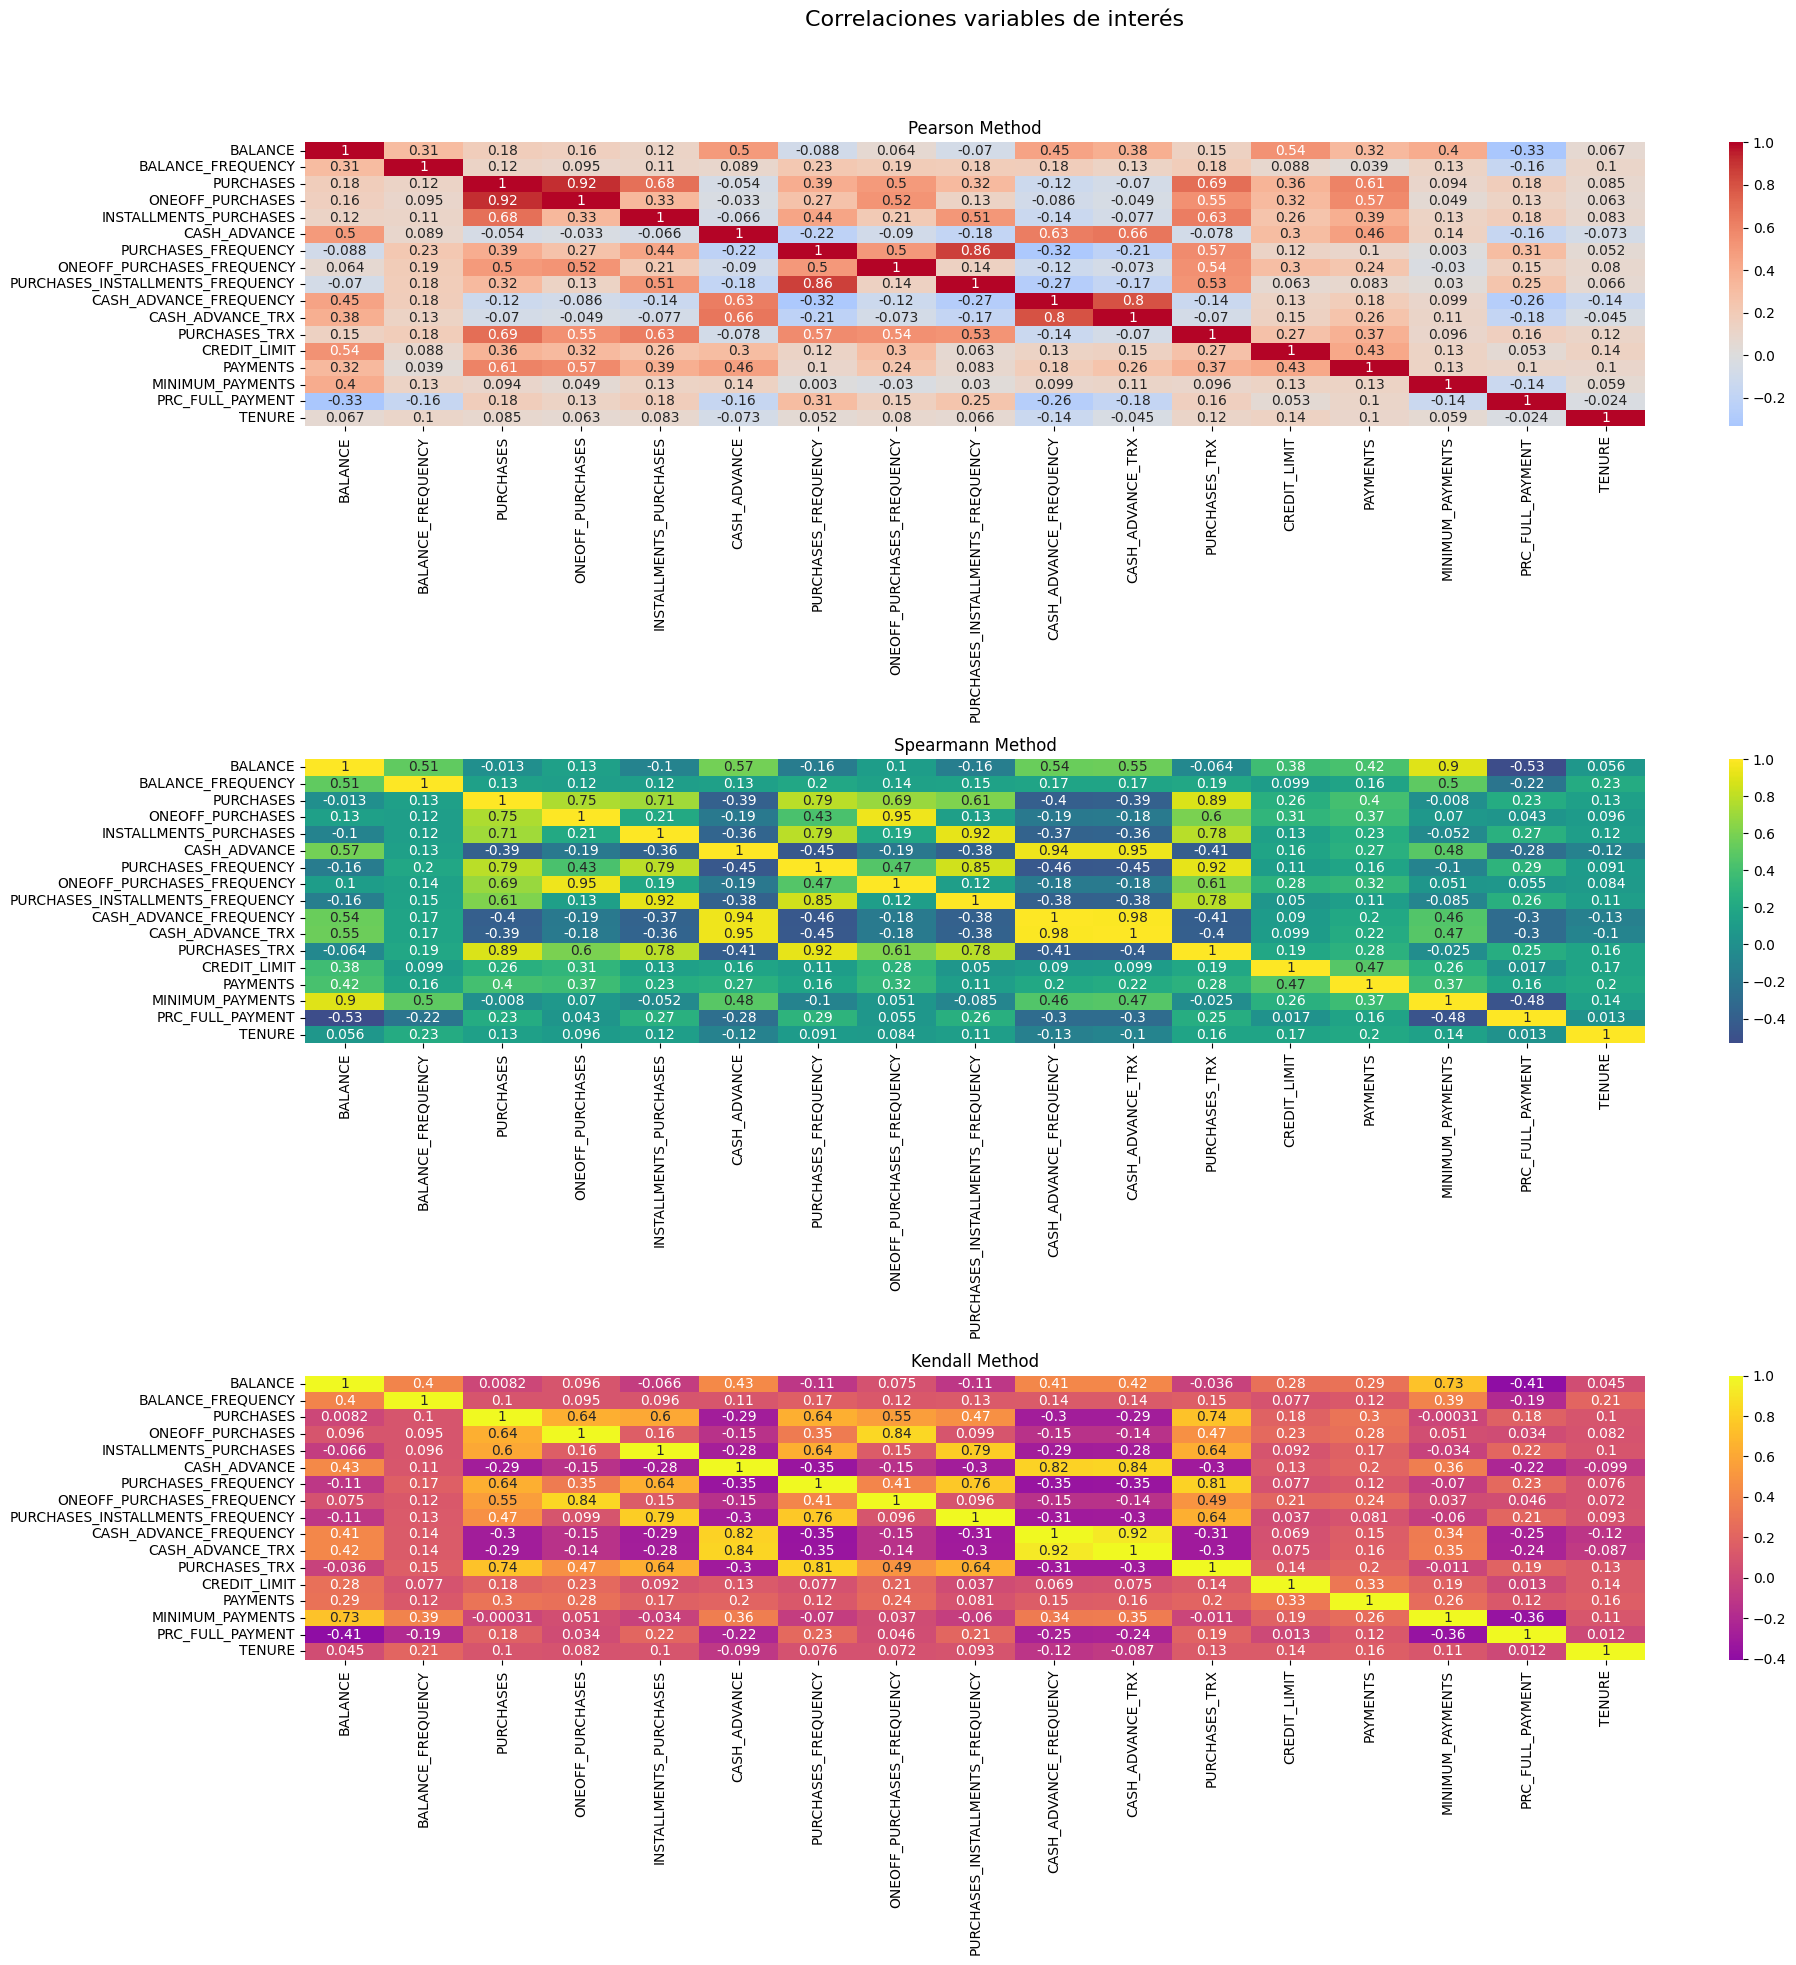

In [88]:
from utils.eda import graph_correlations
graph_correlations(corr_matrix, spearmann, kendall, "Correlaciones variables de interés", figsize= (20,20),num_columns=1)

Estandarizamos las variables

In [94]:
numeric_columns = get_numeric_columns(df)

X = df[numeric_columns]

df_scaled = df.copy()

for column in numeric_columns:
    mean = df_scaled[column].mean()
    std_dev = df_scaled[column].std()

    z_scores = (df_scaled[column] - mean) / std_dev
    df_scaled[column] = z_scores

Caracteristicas importantes

In [95]:
X_selected = df_scaled[["PURCHASES", "PURCHASES_FREQUENCY"]]

Importamos librerias

In [97]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN

Implementamos kmeans

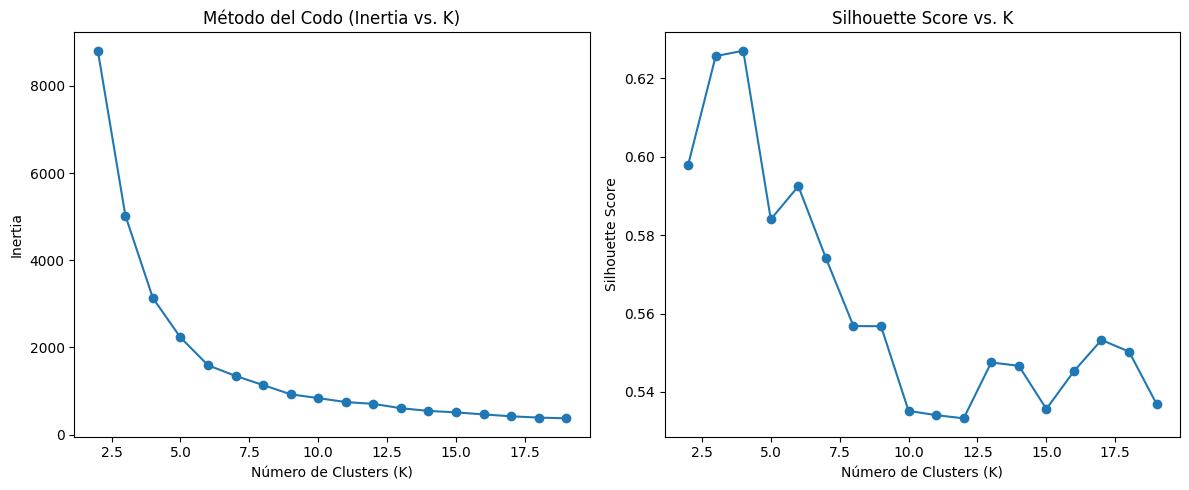

In [99]:
inertia = []
silhouette_scores = []
k_values = range(2, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_selected)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_selected, kmeans.labels_))

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(k_values, inertia, marker='o')
ax[0].set_title('Método del Codo (Inertia vs. K)')
ax[0].set_xlabel('Número de Clusters (K)')
ax[0].set_ylabel('Inertia')

ax[1].plot(k_values, silhouette_scores, marker='o')
ax[1].set_title('Silhouette Score vs. K')
ax[1].set_xlabel('Número de Clusters (K)')
ax[1].set_ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

Podemos observar en el grafico que el codo adecuado es el de K=5

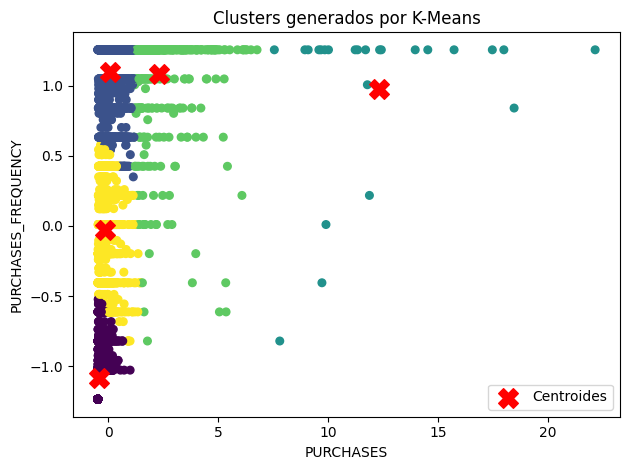

Silhouette Score: 0.58


In [101]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_selected)

y_kmeans = kmeans.predict(X_selected)

plt.scatter(X_selected["PURCHASES"], X_selected["PURCHASES_FREQUENCY"], c=y_kmeans, s=30, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroides')
plt.title("Clusters generados por K-Means")
plt.xlabel("PURCHASES")
plt.ylabel("PURCHASES_FREQUENCY")
plt.legend()
plt.tight_layout()
plt.show()

silhouette_avg = silhouette_score(X_selected, y_kmeans)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Aplicamos DBScan

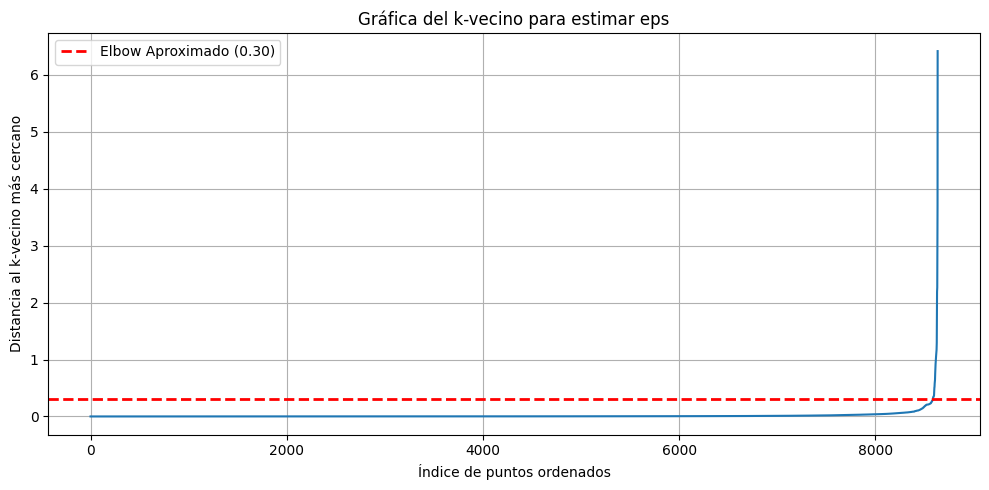

In [103]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

min_samples = 5

nbrs = NearestNeighbors(n_neighbors=min_samples).fit(X_selected)
distances, indices = nbrs.kneighbors(X_selected)

distances = np.sort(distances[:, -1])

plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.title('Gráfica del k-vecino para estimar eps')
plt.xlabel('Índice de puntos ordenados')
plt.ylabel('Distancia al k-vecino más cercano')
elbow = 0.3
plt.axhline(
    elbow,
    color="red",
    linestyle="dashed",
    linewidth=2,
    label=f"Elbow Aproximado ({elbow:.2f})"
)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Obtenemos el score

In [104]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_selected)

score = silhouette_score(X, clusters)
print(score)

0.7222620314648439


In [105]:
eps = 0.3 
min_samples_range = range(3, 15)
scores = []

for min_samples in min_samples_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(X_selected)
    if (len(set(clusters)) > 1 and -1 not in clusters) or (len(set(clusters)) > 2 and -1 in clusters):
        score = silhouette_score(X_selected, clusters)
        scores.append((min_samples, score))

best_min_samples = max(scores, key=lambda x: x[1])
print(f"Mejor min_samples: {best_min_samples[0]} con Silhouette Score: {best_min_samples[1]:.4f}")

Mejor min_samples: 4 con Silhouette Score: 0.7657


In [106]:
from sklearn.model_selection import ParameterGrid

param_grid = {
    'eps': np.arange(0.05, 0.5, 0.01),
    'min_samples': range(1, 15, 1)
}

grid = ParameterGrid(param_grid)

best_params = None
best_score = -1
results = []

for params in grid:
    print(f"Ejecutando iteración con parámetros: {str(params)}")
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    clusters = dbscan.fit_predict(X_selected)
    if (len(set(clusters)) > 1 and -1 not in clusters) or (len(set(clusters)) > 2 and -1 in clusters):
        score = silhouette_score(X_selected, clusters)
        results.append((params['eps'], params['min_samples'], score))
        if score > best_score:
            best_score = score
            best_params = params

results = np.array(results)

print(f"Mejores parámetros: {best_params}")
print(f"Mejor Silhouette Score: {best_score:.4f}")


Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 1}
Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 2}
Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 3}
Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 4}
Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 5}
Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 6}
Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 7}
Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 8}
Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 9}
Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 10}
Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 11}
Ejecutando iteración con parámetros: {'eps': np.float64(0.05), 'min_samples': 12}
Ejecutando iteración con 

Aplicamos DBSCAN

In [107]:
dbscan = DBSCAN(eps=0.3, min_samples=4)
y_dbscan = dbscan.fit_predict(X_selected)

Comparamos metricas

In [108]:
inertia_kmeans = kmeans.inertia_
print(f"Inercia KMeans: {inertia_kmeans}")

sil_score_kmeans = silhouette_score(X_selected, y_kmeans)
print(f"Silhouette Score KMeans: {sil_score_kmeans}")

db_index_kmeans = davies_bouldin_score(X_selected, y_kmeans)
print(f"Davies-Bouldin Index KMeans: {db_index_kmeans}")

ch_score_kmeans = calinski_harabasz_score(X_selected, y_kmeans)
print(f"Calinski Harabasz score KMeans: {ch_score_kmeans}")


print("\n")

sil_score_db = silhouette_score(X_selected, y_dbscan)
print(f"Silhouette Score DBSCAN: {sil_score_db}")

db_index_db = davies_bouldin_score(X_selected, y_dbscan)
print(f"Davies-Bouldin Index DBSCAN: {db_index_db}")

ch_score_db = calinski_harabasz_score(X_selected, y_dbscan)
print(f"Calinski Harabasz score DBSCAN: {ch_score_db}")

Inercia KMeans: 2227.4593362659843
Silhouette Score KMeans: 0.5840099319585196
Davies-Bouldin Index KMeans: 0.5872119346488308
Calinski Harabasz score KMeans: 14571.901790582273


Silhouette Score DBSCAN: 0.7657451497285735
Davies-Bouldin Index DBSCAN: 3.0014577839889967
Calinski Harabasz score DBSCAN: 775.1810218865508


Obtenemos un mejor Silhoutte, menor davies bouldin index y menor Calinski Harabasz score

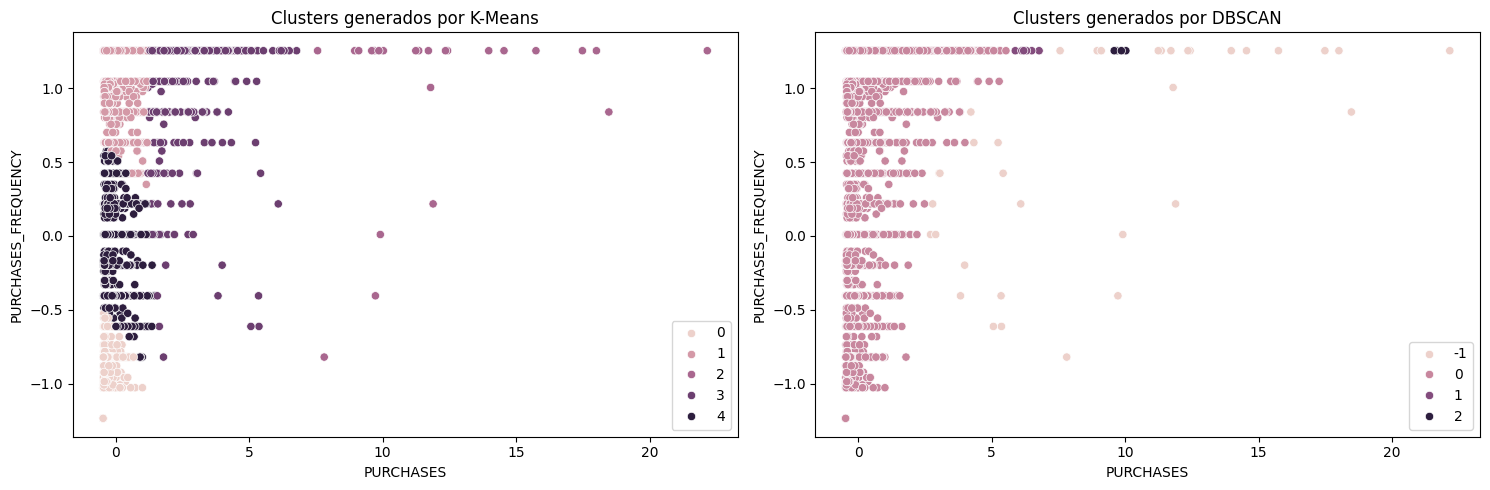

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x=X_selected["PURCHASES"],y=X_selected["PURCHASES_FREQUENCY"], hue=y_kmeans, ax=ax[0])
ax[0].set_title('Clusters generados por K-Means')
ax[0].set_xlabel('PURCHASES')
ax[0].set_ylabel('PURCHASES_FREQUENCY')

sns.scatterplot(x=X_selected["PURCHASES"],y=X_selected["PURCHASES_FREQUENCY"], hue=y_dbscan, ax=ax[1])
ax[1].set_title('Clusters generados por DBSCAN')
ax[1].set_xlabel('PURCHASES')
ax[1].set_ylabel('PURCHASES_FREQUENCY')

plt.tight_layout()
plt.show()

## Resultados

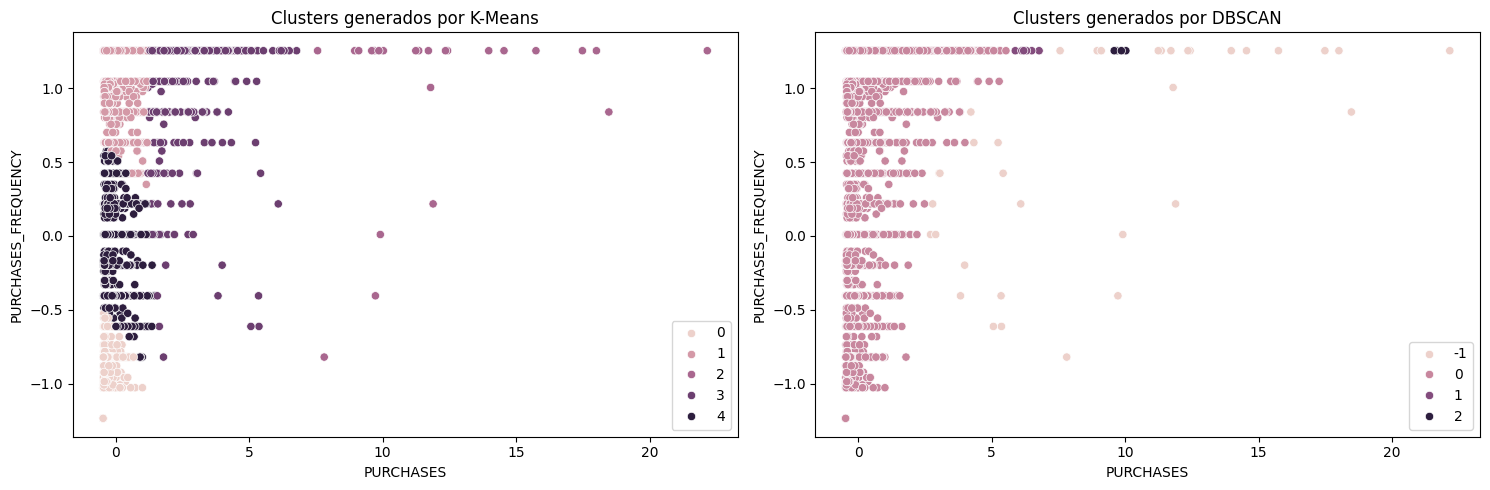

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(x=X_selected["PURCHASES"],y=X_selected["PURCHASES_FREQUENCY"], hue=y_kmeans, ax=ax[0])
ax[0].set_title('Clusters generados por K-Means')
ax[0].set_xlabel('PURCHASES')
ax[0].set_ylabel('PURCHASES_FREQUENCY')

sns.scatterplot(x=X_selected["PURCHASES"],y=X_selected["PURCHASES_FREQUENCY"], hue=y_dbscan, ax=ax[1])
ax[1].set_title('Clusters generados por DBSCAN')
ax[1].set_xlabel('PURCHASES')
ax[1].set_ylabel('PURCHASES_FREQUENCY')

plt.tight_layout()
plt.show()

Clustering con DBSCAN

Número de Clusters:

DBSCAN ha identificado 3 clusters principales (etiquetados como 0, 1 y 2) y una categoría de ruido (-1).
Ruido (-1):

Hay un grupo significativo de puntos clasificados como ruido. Estos puntos no cumplen los criterios de densidad mínima para formar un cluster.
Esto sugiere que algunos datos son dispersos y no se ajustan fácilmente a un grupo definido.
Características del Agrupamiento:

DBSCAN agrupa puntos más densos y clasifica puntos aislados como ruido.
A diferencia de K-Means, no requiere que los clusters sean esféricos, por lo que puede detectar formas de clusters más arbitrarias.
Fortalezas de DBSCAN:

DBSCAN es robusto ante datos dispersos y puntos ruidosos.
Identifica clusters basados en densidad, lo que puede ser útil cuando los datos contienen ruido o tienen distribuciones irregulares.

Clusters definidos vs. ruido:

K-Means clasifica todos los puntos en clusters, incluso si están aislados.
DBSCAN, en cambio, clasifica algunos puntos como ruido (-1), lo que podría ser más apropiado dependiendo del contexto del problema.
Tamaño y forma de los clusters:

K-Means asume que los clusters tienen formas esféricas y tamaños similares, lo que puede no ser adecuado si los datos no cumplen esta suposición.
DBSCAN es más flexible con la forma y el tamaño de los clusters, aunque depende de parámetros como eps y min_samples.
Aplicabilidad:

K-Means podría ser preferido para datos más estructurados o cuando es necesario un número fijo de clusters.
DBSCAN es más adecuado para datos con ruido o cuando los clusters tienen formas y densidades variables.